http://www.ieap.uni-kiel.de/et/people/wimmer/teaching/mhd/ex/ex3/solve_poisson.py

In [2]:
from numpy import *
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
%matplotlib inline
import time

#some global definitions
k = 2.
N = 512
L = 10.

/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


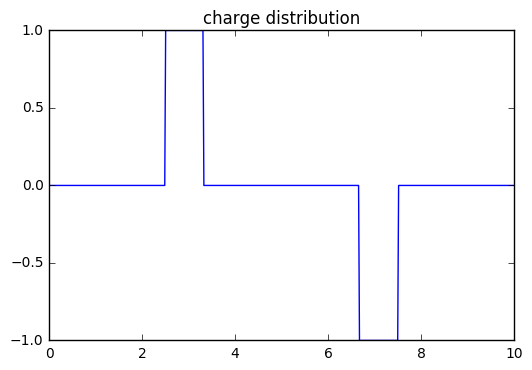

In [30]:
#Set up a charge distribution
charge = zeros(N)
x = linspace(0.,L,N)
#charge = sin(k*2.*pi/L*x)# + 0.05*random.standard_normal(N)
charge = zeros(N)
charge[N/4:N/3] = 1.
charge[2*N/3:3*N/4] = -1.
# charge = cos(2*pi*x/L)
# charge = exp(2j*2*pi*x/L)
#charge[3*N/4:N] = -1.

#plot charge distribution
plt.plot(x, charge)
plt.title('charge distribution')

1.0


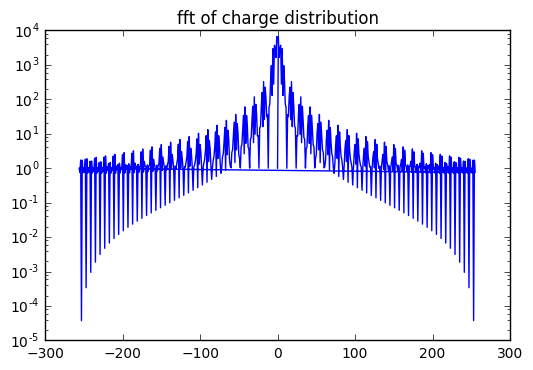

In [43]:
#FFT charge distribution
fourier = fft(charge)
step = L/N
freq = L*fftfreq(N, d=step)
freq[0] = 0.01
plt.semilogy()
plt.plot(freq, abs(fourier)**2)
plt.title('fft of charge distribution')

argm = argmax(abs(fourier)**2)
freqmax = freq[argm]
print(freqmax)

/home/dominik/.anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


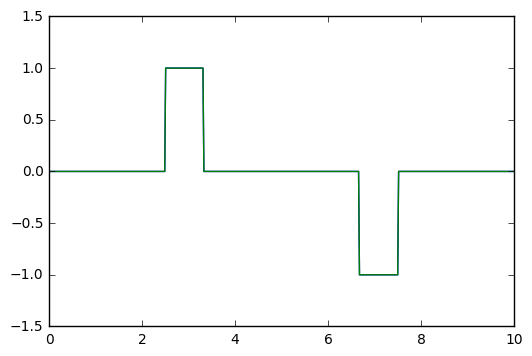

In [44]:
#plot IFFT of charge distribution, show coverage
fil_q = ifft(fourier)
plt.plot(x, fil_q)
plt.plot(x, charge)

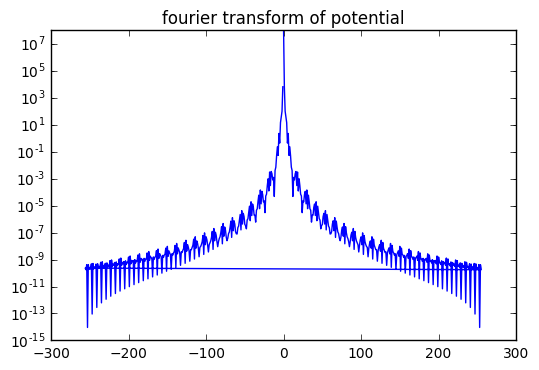

In [45]:
#Divide FFT of charge distribution by k**2
#that is equal to the fourier transform of the potential, fourier_pot
fourier_pot = fourier/freq/freq
#ofreq = freq.copy()
#kappa = sin(freq/step)/(freq/step)
plt.plot(freq, abs(fourier_pot)**2)
plt.semilogy()
plt.title('fourier transform of potential')

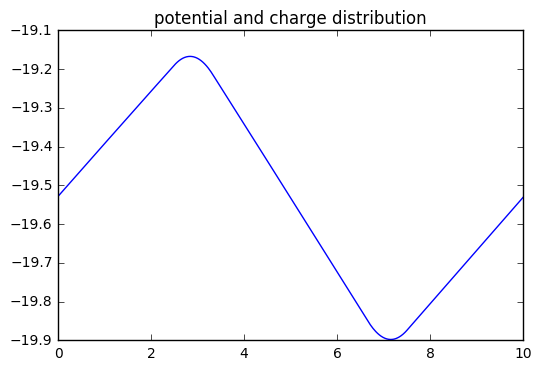

In [46]:
pot = real_if_close(ifft(fourier_pot))
plt.plot(x, pot)
# plt.plot(x, charge)
plt.title('potential and charge distribution')


In [49]:
#differentiate once to obtain electric field
field = zeros(N)
field[1:N-2] = pot[0:N-3] - pot[2:N-1]
field[0] = pot[N-1] - pot[1] #for periodic boundary conditions
field[N-1] = pot[N-2] - pot[0] #for periodic boundary conditions
field /= 2.*step

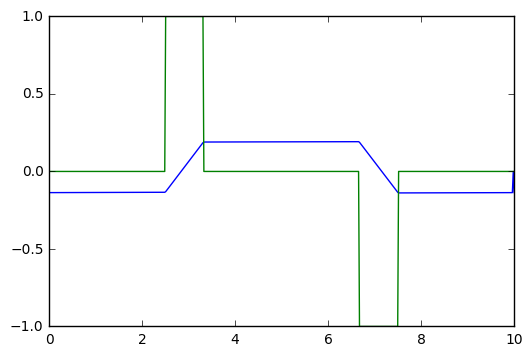

In [51]:
plt.plot(x, field)
plt.plot(x, charge)